<a href="https://colab.research.google.com/github/bintangnabiil/Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow/blob/main/Rangkuman_Chapter_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter 2: End-to-End Machine Learning Project
##1. Gambaran Umum End-to-End ML Project
Chapter ini membahas implementasi proyek Machine Learning dari awal hingga akhir menggunakan California Housing dataset. Proyek ini mencakup seluruh tahapan yang diperlukan dalam dunia nyata, mulai dari pemahaman masalah hingga deployment model.

##2. Langkah-Langkah Utama ML Project
###2.1 Frame the Problem
- Tujuan Bisnis: Membangun model untuk memprediksi harga rumah di California
- Jenis Masalah: Supervised Learning - Regression (prediksi nilai kontinu)
- Performance Measure: Root Mean Square Error (RMSE)
Baseline: Median housing value per district

###2.2 Get the Data
- Dataset: California Housing Prices (1990 Census)
- Features: 8 atribut numerik + 1 kategorikal
- Target: Median house value
- Size: 20,640 instances

###2.3 Explore and Visualize Data
- Statistical Summary: mean, std, min, max, quartiles
- Missing Values: Identifikasi dan handling
- Correlations: Hubungan antar fitur
- Geographic Visualization: Plotting berdasarkan latitude/longitude
- Feature Engineering: Membuat kombinasi fitur baru

###2.4 Prepare the Data
- Data Cleaning: Handle missing values
- Feature Scaling: StandardScaler, MinMaxScaler
- Categorical Encoding: One-hot encoding
- Feature Selection: Pilih fitur yang relevan
- Custom Transformers: Pipeline untuk transformasi data

##3. Teknik Data Preparation yang Penting
###3.1 Handling Missing Values
- Drop instances dengan missing values
- Drop attributes yang banyak missing
- Imputation: Isi dengan median, mean, atau most frequent

###3.2 Categorical Data Encoding

- Ordinal Encoding: Untuk data dengan urutan
- One-Hot Encoding: Untuk data nominal
- Label Encoding: Sederhana tapi bisa misleading

###3.3 Feature Scaling

- Standardization: Mean = 0, Std = 1
- Min-Max Normalization: Scale ke range [0,1]
- Robust Scaling: Menggunakan median dan IQR

##4. Model Selection dan Traininig
###4.1 Model yang Digunakan

- Linear Regression: Baseline model
- Decision Tree: Non-linear model
- Random Forest: Ensemble method
- Support Vector Machine: Kernel-based

###4.2 Cross-Validation

- K-Fold Cross-Validation untuk evaluasi yang robust
- Menghindari overfitting pada validation set
- Memberikan confidence interval untuk performance

###4.3 Hyperparameter Tuning

- Grid Search: Exhaustive search
- Random Search: Sampling-based search
- Bayesian Optimization: Smart search strategy

##5. Model Evaluation dan Fine-Tuning
###5.1 Error Analysis

- Analisis residuals
- Feature importance
- Error distribution
- Outlier detection

###5.2 Feature Engineering Lanjutan

- Combination Features: rooms_per_household, population_per_household
- Geographic Features: Distance to ocean
- Domain Knowledge: Incorporate business understanding

##6. Model Deployment Considerations
###6.1 Monitoring

- Performance monitoring
- Data drift detection
- Model degradation over time
- A/B testing framework

###6.2 Maintenance

- Regular retraining
- Feature pipeline updates
- Model versioning
- Rollback strategies

##7. Key Lessons dari Chapter 2
###7.1 Data Quality is King

- Garbage in, garbage out
- Spend time understanding your data
- Clean data systematically

###7.2 Feature Engineering Matters

- Domain knowledge is crucial
- Creative feature combinations
- Iterative process

###7.3 Systematic Approach

- Follow structured methodology
- Document everything
- Reproducible experiments

#Contoh Kode Chapter 2

In [1]:
# Import libraries yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print("=== HANDS-ON MACHINE LEARNING CHAPTER 2 ===")
print("End-to-End ML Project: California Housing Prices\n")

=== HANDS-ON MACHINE LEARNING CHAPTER 2 ===
End-to-End ML Project: California Housing Prices



In [2]:
# 1. LOAD AND EXPLORE THE DATA
print("1. LOADING AND EXPLORING DATA")
print("-" * 50)

# Load California Housing dataset
housing = fetch_california_housing(as_frame=True)
housing_df = housing.frame

print(f"Dataset shape: {housing_df.shape}")
print(f"Features: {list(housing.feature_names)}")
print(f"Target: {housing.target_names[0]}")

# Basic info about the dataset
print("\nDataset Info:")
print(housing_df.info())

print("\nStatistical Summary:")
print(housing_df.describe())

# Check for missing values
print(f"\nMissing values: {housing_df.isnull().sum().sum()}")


1. LOADING AND EXPLORING DATA
--------------------------------------------------
Dataset shape: (20640, 9)
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target: MedHouseVal

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Statistical Summary:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000


2. DATA VISUALIZATION
--------------------------------------------------


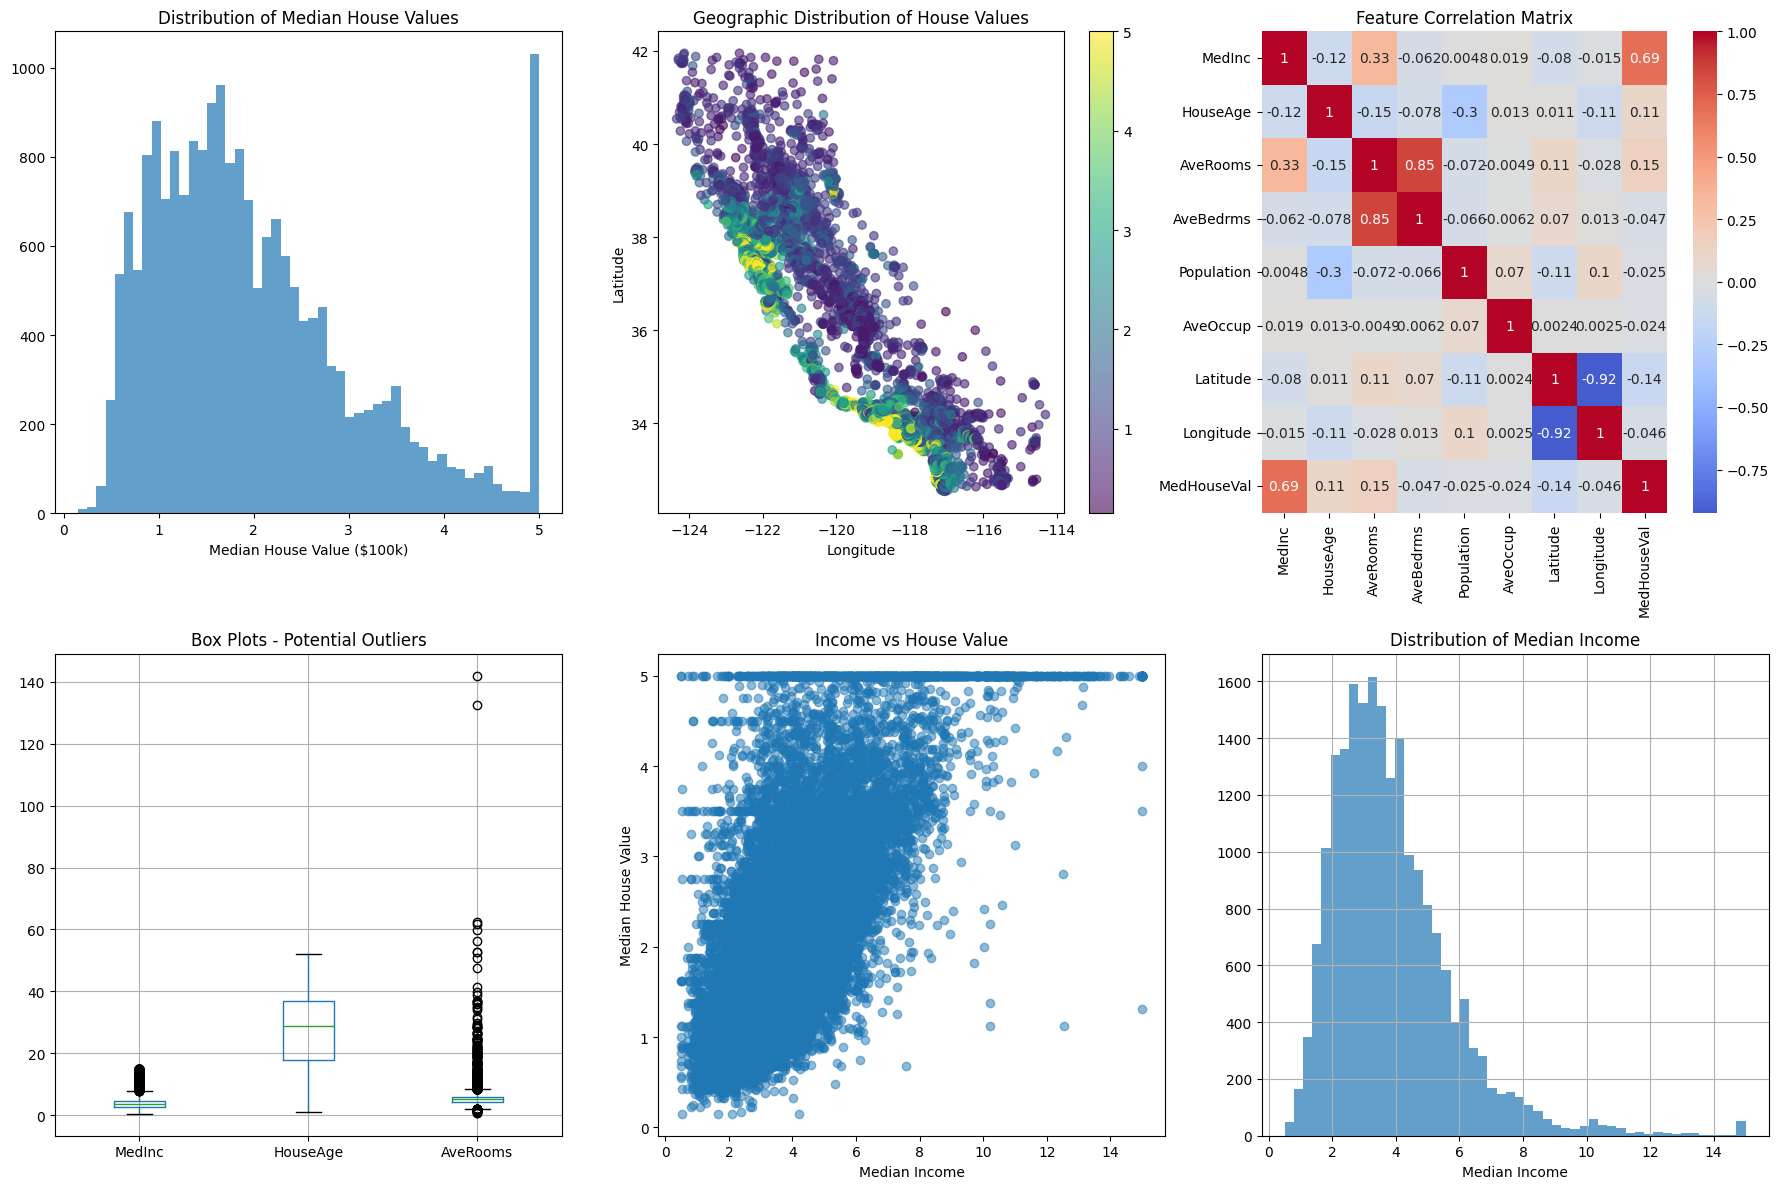

In [3]:
# 2. VISUALIZE THE DATA
print("\n2. DATA VISUALIZATION")
print("-" * 50)

# Create visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Histogram of target variable
axes[0, 0].hist(housing_df['MedHouseVal'], bins=50, alpha=0.7)
axes[0, 0].set_title('Distribution of Median House Values')
axes[0, 0].set_xlabel('Median House Value ($100k)')

# Geographic scatter plot
scatter = axes[0, 1].scatter(housing_df['Longitude'], housing_df['Latitude'],
                           c=housing_df['MedHouseVal'], cmap='viridis', alpha=0.6)
axes[0, 1].set_title('Geographic Distribution of House Values')
axes[0, 1].set_xlabel('Longitude')
axes[0, 1].set_ylabel('Latitude')
plt.colorbar(scatter, ax=axes[0, 1])

# Correlation heatmap
corr_matrix = housing_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[0, 2])
axes[0, 2].set_title('Feature Correlation Matrix')

# Box plots for outlier detection
housing_df.boxplot(column=['MedInc', 'HouseAge', 'AveRooms'], ax=axes[1, 0])
axes[1, 0].set_title('Box Plots - Potential Outliers')

# Scatter plot: Income vs House Value
axes[1, 1].scatter(housing_df['MedInc'], housing_df['MedHouseVal'], alpha=0.5)
axes[1, 1].set_xlabel('Median Income')
axes[1, 1].set_ylabel('Median House Value')
axes[1, 1].set_title('Income vs House Value')

# Feature distribution
housing_df['MedInc'].hist(bins=50, ax=axes[1, 2], alpha=0.7)
axes[1, 2].set_title('Distribution of Median Income')
axes[1, 2].set_xlabel('Median Income')

plt.tight_layout()
plt.show()


In [4]:
# 3. FEATURE ENGINEERING
print("\n3. FEATURE ENGINEERING")
print("-" * 50)

# Create new features
housing_df_enhanced = housing_df.copy()

# Rooms per household
housing_df_enhanced['rooms_per_household'] = (
    housing_df_enhanced['AveRooms'] * housing_df_enhanced['AveOccup']
)

# Bedrooms ratio
housing_df_enhanced['bedrooms_per_room'] = (
    housing_df_enhanced['AveBedrms'] / housing_df_enhanced['AveRooms']
)

# Population per household
housing_df_enhanced['population_per_household'] = (
    housing_df_enhanced['Population'] / housing_df_enhanced['AveOccup']
)

print("New features created:")
print("- rooms_per_household")
print("- bedrooms_per_room")
print("- population_per_household")

# Check correlation of new features with target
new_features = ['rooms_per_household', 'bedrooms_per_room', 'population_per_household']
new_correlations = housing_df_enhanced[new_features + ['MedHouseVal']].corr()['MedHouseVal'].sort_values(ascending=False)
print(f"\nCorrelation with target:")
print(new_correlations[:-1])



3. FEATURE ENGINEERING
--------------------------------------------------
New features created:
- rooms_per_household
- bedrooms_per_room
- population_per_household

Correlation with target:
MedHouseVal                 1.000000
population_per_household    0.065843
rooms_per_household         0.003504
Name: MedHouseVal, dtype: float64


In [5]:
# 4. PREPARE DATA FOR MACHINE LEARNING
print("\n4. DATA PREPARATION")
print("-" * 50)

# Separate features and target
X = housing_df_enhanced.drop('MedHouseVal', axis=1)
y = housing_df_enhanced['MedHouseVal']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=pd.cut(y, bins=5, labels=False)
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

# Create preprocessing pipeline
numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()

# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])



4. DATA PREPARATION
--------------------------------------------------
Training set size: (16512, 11)
Test set size: (4128, 11)


In [6]:
# 5. TRAIN AND EVALUATE MULTIPLE MODELS
print("\n5. MODEL TRAINING AND EVALUATION")
print("-" * 50)

# Define models to compare
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=30, random_state=42),
    'SVR': SVR(kernel='rbf')
}

# Store results
results = {}

for name, model in models.items():
    # Create pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train,
                               cv=5, scoring='neg_mean_squared_error')

    # Convert to RMSE
    rmse_scores = np.sqrt(-cv_scores)

    results[name] = {
        'mean_rmse': rmse_scores.mean(),
        'std_rmse': rmse_scores.std(),
        'scores': rmse_scores
    }

    print(f"{name}:")
    print(f"  RMSE: {rmse_scores.mean():.4f} (+/- {rmse_scores.std() * 2:.4f})")

# Find best model
best_model_name = min(results.keys(), key=lambda x: results[x]['mean_rmse'])
print(f"\nBest Model: {best_model_name}")



5. MODEL TRAINING AND EVALUATION
--------------------------------------------------
Linear Regression:
  RMSE: 0.8399 (+/- 0.5887)
Decision Tree:
  RMSE: 0.7346 (+/- 0.0255)
Random Forest:
  RMSE: 0.5259 (+/- 0.0162)
SVR:
  RMSE: 0.5766 (+/- 0.0131)

Best Model: Random Forest


In [7]:
# 6. HYPERPARAMETER TUNING
print("\n6. HYPERPARAMETER TUNING")
print("-" * 50)

# Tune Random Forest (assuming it's the best or close to best)
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Hyperparameter grid
param_grid = {
    'regressor__n_estimators': [30, 50, 100],
    'regressor__max_features': [2, 4, 6, 8],
    'regressor__max_depth': [None, 10, 20, 30]
}

# Grid search
print("Performing Grid Search...")
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5,
                          scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV RMSE: {np.sqrt(-grid_search.best_score_):.4f}")



6. HYPERPARAMETER TUNING
--------------------------------------------------
Performing Grid Search...
Best parameters: {'regressor__max_depth': None, 'regressor__max_features': 4, 'regressor__n_estimators': 100}
Best CV RMSE: 0.5158



7. FEATURE IMPORTANCE ANALYSIS
--------------------------------------------------
Top 10 Most Important Features:
                     feature  importance
0                     MedInc    0.368114
9          bedrooms_per_room    0.113706
5                   AveOccup    0.101138
6                   Latitude    0.096439
7                  Longitude    0.092478
2                   AveRooms    0.055550
1                   HouseAge    0.051689
8        rooms_per_household    0.051117
3                  AveBedrms    0.026277
10  population_per_household    0.022247


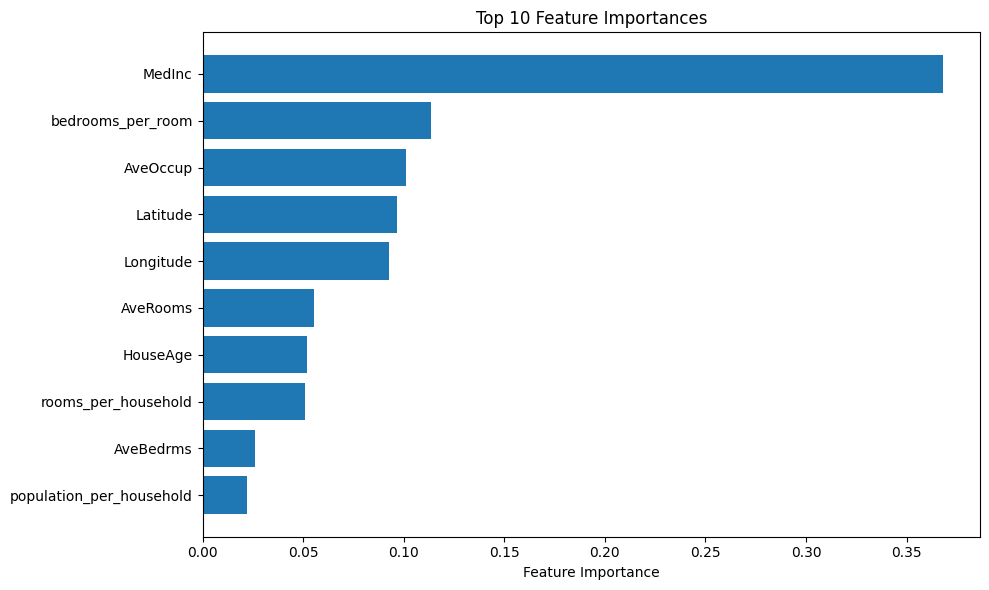

In [8]:
# 7. FEATURE IMPORTANCE ANALYSIS
print("\n7. FEATURE IMPORTANCE ANALYSIS")
print("-" * 50)

# Get feature importance from best model
best_model = grid_search.best_estimator_
feature_names = (numeric_features)

# Get feature importances
importances = best_model.named_steps['regressor'].feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features:")
print(feature_importance_df.head(10))

# Visualize feature importance
plt.figure(figsize=(10, 6))
top_features = feature_importance_df.head(10)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [9]:
# 8. FINAL MODEL EVALUATION
print("\n8. FINAL MODEL EVALUATION")
print("-" * 50)

# Train final model on full training set
final_model = grid_search.best_estimator_
final_model.fit(X_train, y_train)

# Predictions on test set
y_pred = final_model.predict(X_test)

# Calculate metrics
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_mae = mean_absolute_error(y_test, y_pred)

print(f"Final Model Performance on Test Set:")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAE: {test_mae:.4f}")

# Create confidence interval
confidence_level = 0.95
squared_errors = (y_pred - y_test) ** 2
confidence_interval = np.sqrt(stats.t.interval(confidence_level, len(squared_errors)-1,
                                              loc=squared_errors.mean(),
                                              scale=stats.sem(squared_errors)))

print(f"95% Confidence Interval for RMSE: [{confidence_interval[0]:.4f}, {confidence_interval[1]:.4f}]")


8. FINAL MODEL EVALUATION
--------------------------------------------------
Final Model Performance on Test Set:
RMSE: 0.4985
MAE: 0.3334
95% Confidence Interval for RMSE: [0.4774, 0.5187]



9. ERROR ANALYSIS
--------------------------------------------------
Residual Statistics:
Mean: 0.0076
Std: 0.4985
Min: -3.0588
Max: 2.7455


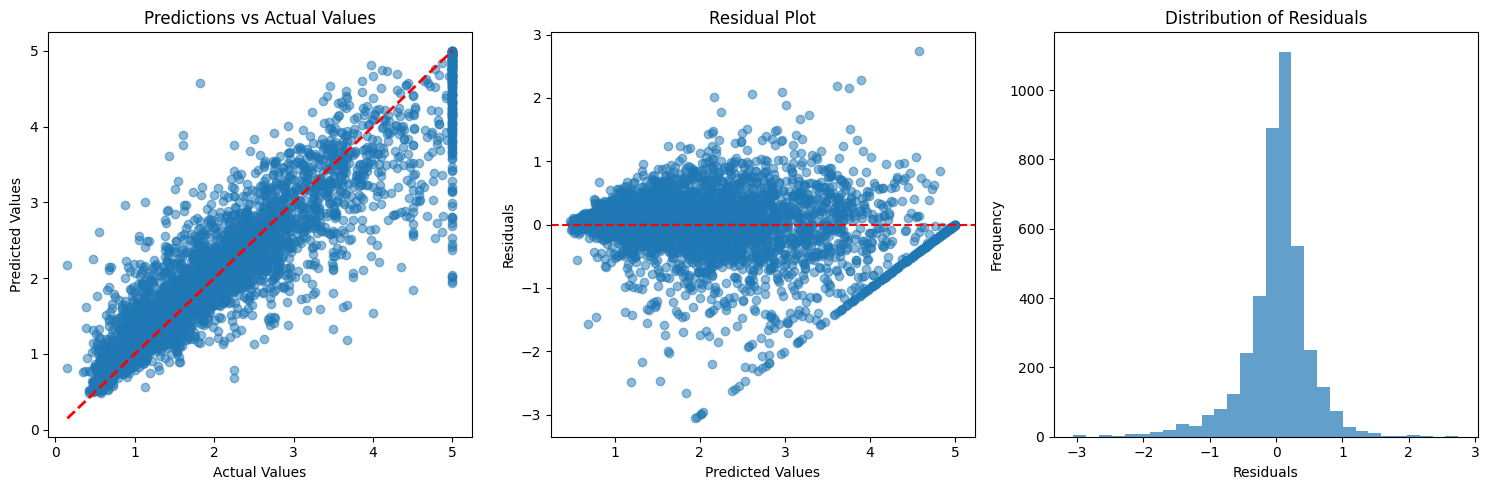

In [10]:
# 9. ERROR ANALYSIS
print("\n9. ERROR ANALYSIS")
print("-" * 50)

# Calculate residuals
residuals = y_pred - y_test

# Residual statistics
print(f"Residual Statistics:")
print(f"Mean: {residuals.mean():.4f}")
print(f"Std: {residuals.std():.4f}")
print(f"Min: {residuals.min():.4f}")
print(f"Max: {residuals.max():.4f}")

# Visualize predictions vs actual
plt.figure(figsize=(15, 5))

# Predictions vs Actual
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actual Values')

# Residual plot
plt.subplot(1, 3, 2)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Residual histogram
plt.subplot(1, 3, 3)
plt.hist(residuals, bins=30, alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.tight_layout()
plt.show()


In [12]:
# 10. SAMPLE PREDICTIONS
print("\n10. SAMPLE PREDICTIONS")
print("-" * 50)

# Show some example predictions
sample_indices = np.random.choice(len(X_test), 5, replace=False)
sample_X = X_test.iloc[sample_indices]
sample_predictions = final_model.predict(sample_X)
sample_actual = y_test.iloc[sample_indices]

print("Sample Predictions:")
for i, idx in enumerate(sample_indices):
    print(f"House {idx}: Predicted=${sample_predictions[i]:.2f}k, Actual=${sample_actual.iloc[i]:.2f}k, "
          f"Error=${abs(sample_predictions[i] - sample_actual.iloc[i]):.2f}k")

print("\n=== CHAPTER 2 COMPLETE ===")
print("\nKey Takeaways:")
print("1. Always start with data exploration and visualization")
print("2. Feature engineering can significantly improve model performance")
print("3. Compare multiple models using cross-validation")
print("4. Hyperparameter tuning can improve model performance")
print("5. Always evaluate on a separate test set")
print("6. Analyze errors to understand model limitations")
print("7. Consider confidence intervals for performance estimates")



10. SAMPLE PREDICTIONS
--------------------------------------------------
Sample Predictions:
House 3485: Predicted=$3.43k, Actual=$2.55k, Error=$0.88k
House 3735: Predicted=$2.34k, Actual=$2.15k, Error=$0.18k
House 592: Predicted=$2.56k, Actual=$2.65k, Error=$0.09k
House 3111: Predicted=$1.40k, Actual=$1.39k, Error=$0.01k
House 2279: Predicted=$1.74k, Actual=$1.71k, Error=$0.03k

=== CHAPTER 2 COMPLETE ===

Key Takeaways:
1. Always start with data exploration and visualization
2. Feature engineering can significantly improve model performance
3. Compare multiple models using cross-validation
4. Hyperparameter tuning can improve model performance
5. Always evaluate on a separate test set
6. Analyze errors to understand model limitations
7. Consider confidence intervals for performance estimates
